In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
%config Completer.use_jedi = False

In [2]:
# Y = [E, S, ES, P], K = [k1, k2, k3]
Y0 = [1, 10, 0, 0]
K0 = [100, 600, 150]

# Fourth-order RungeKutta method for Q2.2

In [3]:
# System of partial differential equations
def f(Y, t, K):
    E = Y[0]
    S = Y[1]
    ES = Y[2]
    P = Y[3]
    k1 = K[0]
    k2 = K[1]
    k3 = K[2]
    
    dE = -k1*E*S + k2*ES + k3*ES
    dS = -k1*E*S + k2*ES
    dES = k1*E*S - k2*ES - k3*ES
    dP = k3*ES
    
    return np.array([dE, dS, dES, dP])

In [4]:
#fourth-order Runge Kutta expression
def RK4(f, Y0, dt, N):
    Yn = np.zeros((N + 1, len(Y0)))
    Yn[0, :] = Y0
    t = np.linspace(1, dt*N, N)
    for i in range(0, N):
        K1 = f(Yn[i, :], t[i], K0)
        K2 = f(Yn[i, :]+dt*K1/2, t[i]+dt/2, K0)
        K3 = f(Yn[i, :]+dt*K2/2, t[i]+dt/2, K0)
        K4 = f(Yn[i, :]+dt*K3, t[i]+dt, K0)
        #print(K1, K2, K3, K4)
        Yn[i+1, :] = Yn[i, :] + dt/6 * (K1 + 2*K2 + 2*K3 + K4)
    
    return Yn

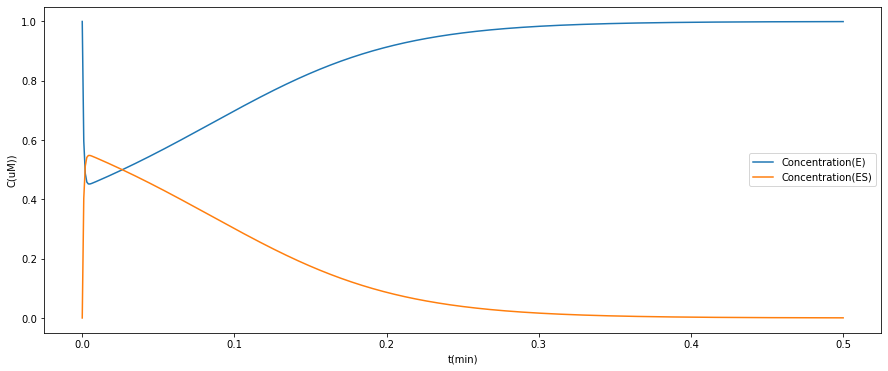

In [5]:
dt = 0.001
N = 500
t = np.linspace(0, dt*N, N+1)
Yn = RK4(f, Y0, dt, N)
plt.figure(figsize=(15, 6))
plt.plot(t, Yn[:, 0])
#plt.plot(t, Yn[:, 1])
plt.plot(t, Yn[:, 2])
#plt.plot(t, Yn[:, 3])
plt.xlabel("t(min)")
plt.ylabel("C(uM))")
plt.legend(["Concentration(E)", "Concentration(ES)"])

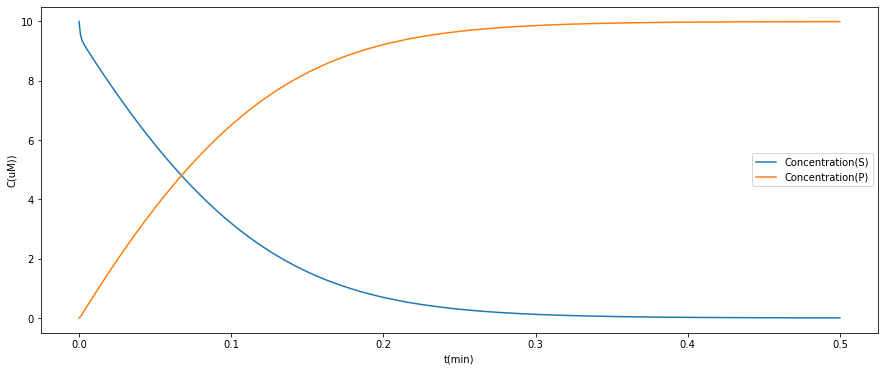

In [6]:
plt.figure(figsize=(15, 6))
#plt.plot(t, Yn[:, 0])
plt.plot(t, Yn[:, 1])
#plt.plot(t, Yn[:, 2])
plt.plot(t, Yn[:, 3])
plt.xlabel("t(min)")
plt.ylabel("C(uM))")
plt.legend(["Concentration(S)", "Concentration(P)"])

# Michaelis-Menten equation for Q2.3

In [7]:
def Vfun(S, Et, Km, k3):
    return (k3*Et*S) / (Km+S)

Text(0, 0.5, 'Velocity(uM/min)')

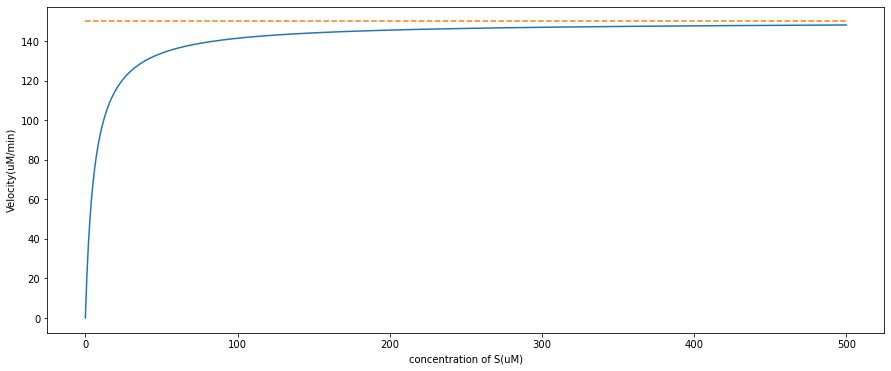

In [8]:
s = np.linspace(0, 500, 1000)
k1 = 100
k2 = 600
k3 = 150
Km = k2 / k1
Et=1
v = Vfun(s, Et, Km, k3)
plt.figure(figsize=(15, 6))
plt.plot(s, v)
plt.plot(s, [150]*1000, linestyle="--")
plt.xlabel("concentration of S(uM)")
plt.ylabel("Velocity(uM/min)")